Название проекта: Прогнозирование цен на недвижимость.
Датасет: California Housing Price.

In [60]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Заполним пропуски медианами.


In [63]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

Теперь рассмотрим корреляционную матрцу относительно всех числовых признаков. Также добавим новую фичу, говорящую нам о количестве комнат на группу людей(семью или сожителей).

<class 'pandas.core.frame.DataFrame'>


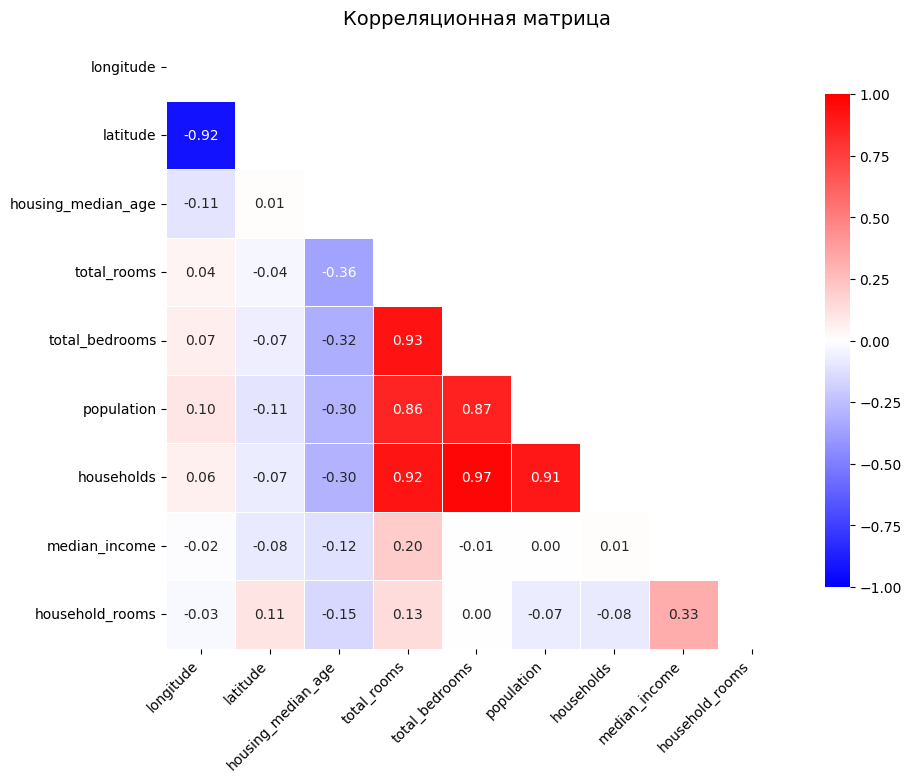

In [64]:
df['household_rooms'] = df['total_rooms'] / df['households']
df_corr = df.drop(columns=['median_house_value', 'ocean_proximity'], errors='ignore')

print(type(df_corr))

df_corr = df_corr.select_dtypes(include=[np.number])

correlation_matrix = df_corr.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap="bwr",
            vmin=-1, vmax=1,
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": .8})


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Корреляционная матрица", fontsize=14)

plt.show()

Удаляем сильно коррелирующие признаки. Как-то агрегировать, например кластеризировать, longitude и latitude мы не будем, так как именно в таком виде они имеют наибольшую важность как данные для обучения(было выяснено на практике).

In [65]:
df.drop(columns=['total_bedrooms', 'population', 'households'], inplace=True)

Теперь проверим выбросы.

/tmp/ipython-input-66-1154157673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
/tmp/ipython-input-66-1154157673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
/tmp/ipython-input-66-1154157673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
/tmp/ipython-input-66-1154157673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

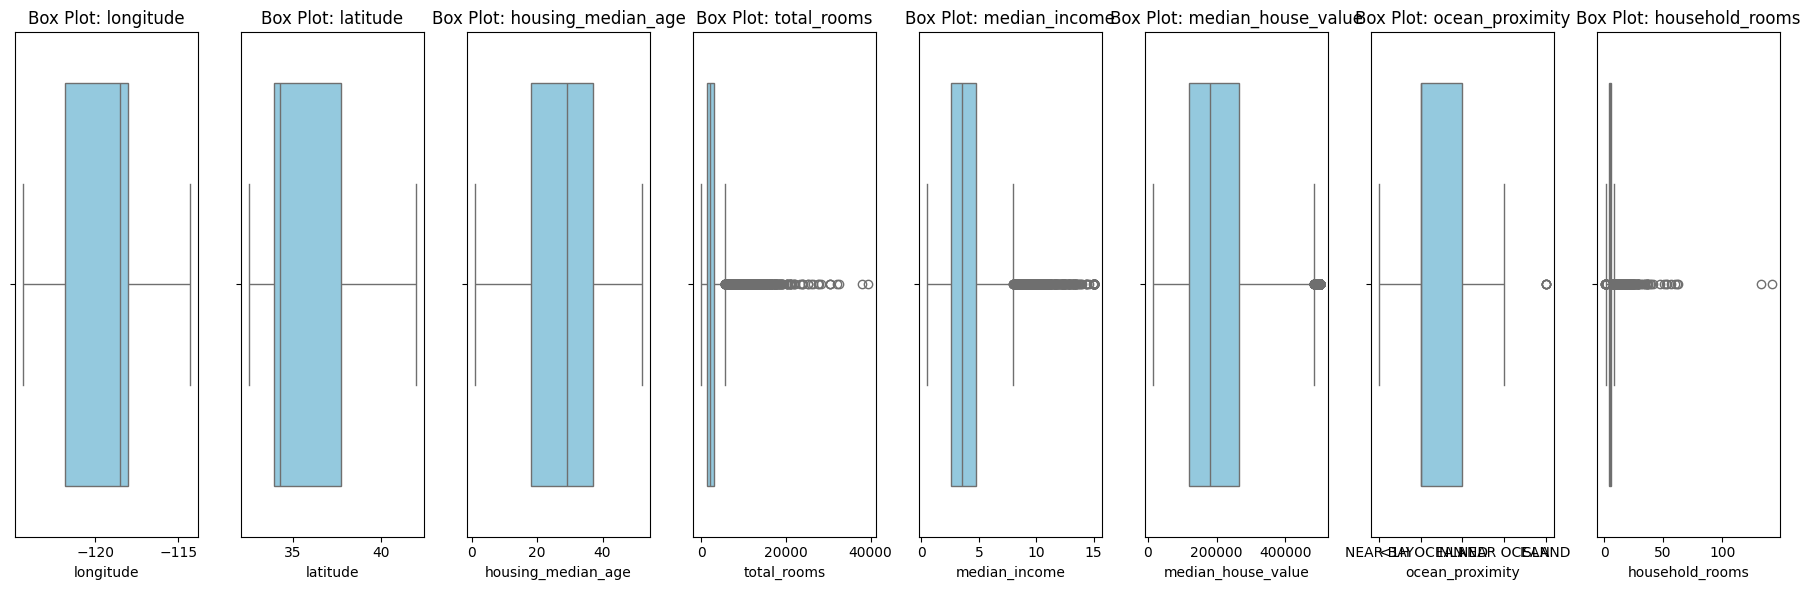

In [66]:
num_features = df.columns.tolist()

fig, axes = plt.subplots(1, len(num_features), figsize=(18,6))
for i, feature in enumerate(num_features):
    sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
    axes[i].set_title(f'Box Plot: {feature}')
    axes[i].set_xlabel(feature)
plt.tight_layout()
plt.show()


In [67]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity,household_rooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,3.870671,206855.816909,NaN,5.429000
std,2.003532,2.135952,12.585558,2181.615252,1.899822,115395.615874,NaN,2.474173
min,-124.350000,32.540000,1.000000,2.000000,0.499900,14999.000000,NaN,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,2.563400,119600.000000,NaN,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,3.534800,179700.000000,NaN,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,4.743250,264725.000000,NaN,6.052381


В качестве чистки выбросов при помощи IQR было решено просто удалять объекты.

In [68]:

df_filtered = df.copy()

for col in df_filtered.select_dtypes(include='number').drop(columns=['longitude','latitude']).columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.0 * IQR
    upper = Q3 + 1.0 * IQR
    mask = (df_filtered[col] >= lower) & (df_filtered[col] <= upper)

    if 'combined_mask' in locals():
        combined_mask &= mask
    else:
        combined_mask = mask

# применяем финальную маску
df = df_filtered[combined_mask]


Также заметим категориальный признак 'ocean_proximity', который мы можем агрегировать при помощи one-hot encoding.

/tmp/ipython-input-70-1785122427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
/tmp/ipython-input-70-1785122427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
/tmp/ipython-input-70-1785122427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
/tmp/ipython-input-70-1785122427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

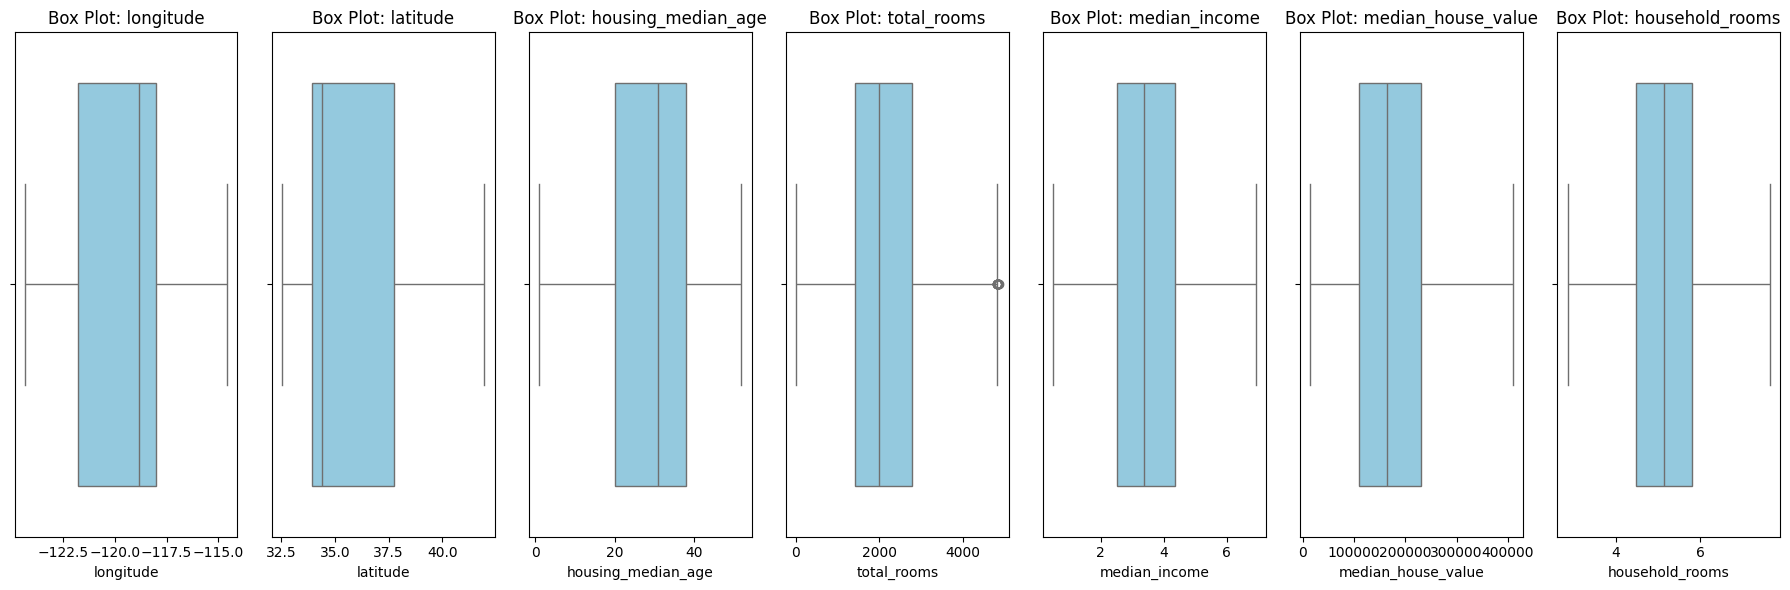

In [70]:
# агрегирование
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
num_features = df.select_dtypes(include='number').columns.tolist()

# проверка на чистку выбросов
fig, axes = plt.subplots(1, len(num_features), figsize=(18,6))
for i, feature in enumerate(num_features):
    sns.boxplot(data = df, x = feature, ax = axes[i], palette=['skyblue'])
    axes[i].set_title(f'Box Plot: {feature}')
    axes[i].set_xlabel(feature)
plt.tight_layout()
plt.show()


Теперь посмотрим плотности распределения вероятностей, ведь может оказаться что некоторые фичи будут безполезны.

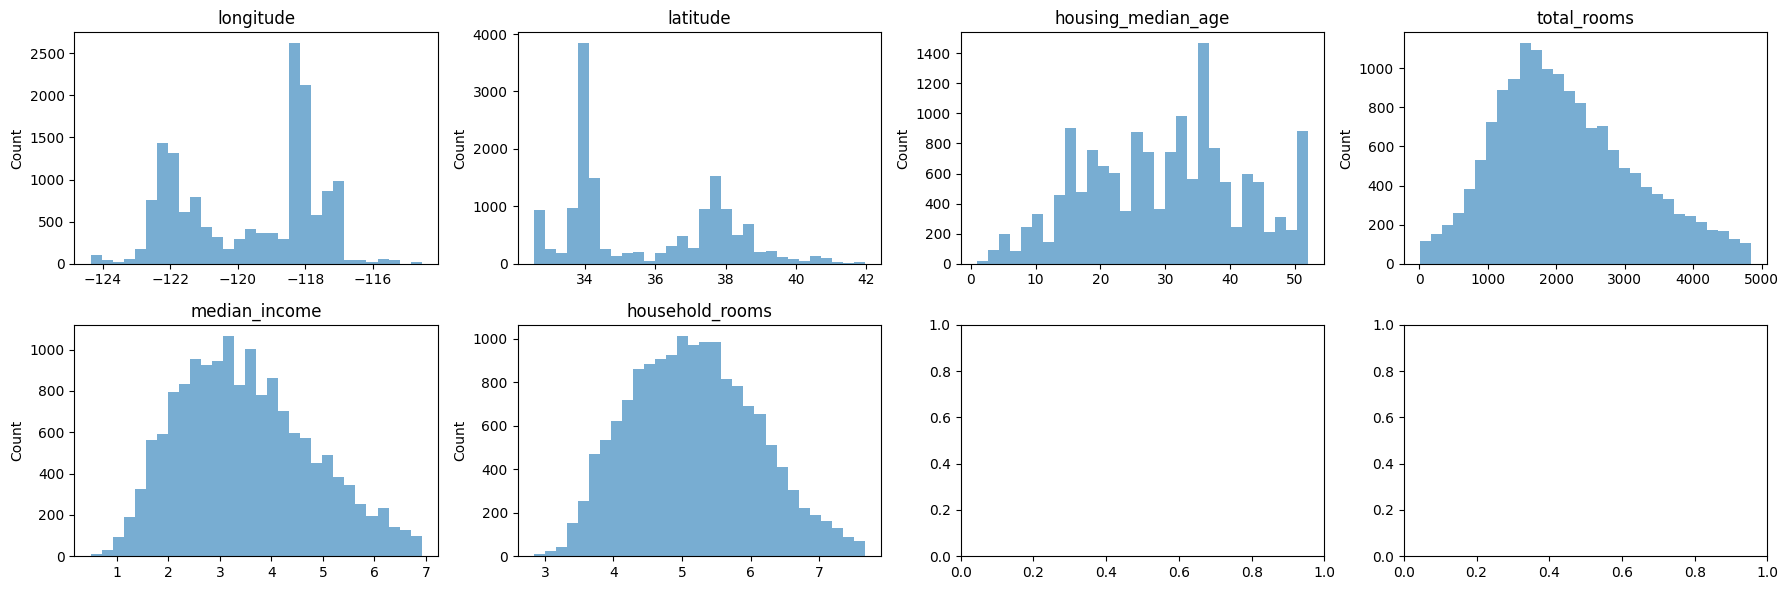

In [71]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop('median_house_value')

fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2 + 1, figsize=(len(num_cols)*3, 6))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.hist(df[col], bins=30, alpha=0.6)
    ax.set_title(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [72]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,household_rooms,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389,15389,15389,15389
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10094,15387,13769,13495
mean,-119.621946,35.720076,29.742024,2133.901813,3.504237,177440.957762,5.170406,NaN,NaN,NaN,NaN
std,2.003677,2.172110,11.958287,1004.066086,1.287124,83568.978418,0.913996,NaN,NaN,NaN,NaN
min,-124.350000,32.550000,1.000000,15.000000,0.499900,14999.000000,2.841837,NaN,NaN,NaN,NaN
25%,-121.770000,33.940000,20.000000,1410.000000,2.528800,110000.000000,4.479760,NaN,NaN,NaN,NaN
50%,-118.830000,34.420000,31.000000,1994.000000,3.372400,165100.000000,5.135021,NaN,NaN,NaN,NaN
75%,-118.020000,37.740000,38.000000,2770.000000,4.363600,231200.000000,5.803951,NaN,NaN,NaN,NaN


Ну а теперь используя подготовленные данные мы можем начать обучать наши модели начиная с линейной регрессии.

In [73]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Определим нашу функцию для отображения метрик.

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def metrics(y_train, y_hat, y_test, y_pred):
    train_mae = mean_absolute_error(y_train, y_hat)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_hat))
    train_r2 = r2_score(y_train, y_hat)

    print(f'Значение MAE на Train наборе {train_mae}')
    print(f'Значение RMSE на Train наборе {train_rmse}')
    print(f'Значение R^2 на Train наборе {train_r2}')

    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    print(f'Значение MAE на Test наборе {test_mae}')
    print(f'Значение RMSE на Test наборе {test_rmse}')
    print(f'Значение R^2 на Test наборе {test_r2}')

Линейная регрессия:

In [75]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [76]:
y_hat = lr.predict(X_train)
y_pred = lr.predict(X_test)
metrics(y_train,y_hat,y_test,y_pred)

Значение MAE на Train наборе 40961.33304093522
Значение RMSE на Train наборе 53395.410617943446
Значение R^2 на Train наборе 0.593607797825898
Значение MAE на Test наборе 41055.773770197295
Значение RMSE на Test наборе 53805.085571785225
Значение R^2 на Test наборе 0.5795512100296127


Линейная регрессия с применением регуляризации Ridge:

In [77]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

ridge_params = {'alpha': np.logspace(-3,3,50)}
ridge_params

{'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
        3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
        9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
        2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
        9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
        2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
        8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
        2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
        8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
        2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
        7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
        2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
        7.54312006e+02, 1.00000000e+03])}

In [78]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge,
                        param_grid=ridge_params,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=3
                       )

ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .............alpha=0.001;, score=-2757860712.260 total time=   0.0s
[CV 2/5] END .............alpha=0.001;, score=-2913775099.224 total time=   0.0s
[CV 3/5] END .............alpha=0.001;, score=-2800766201.698 total time=   0.0s
[CV 4/5] END .............alpha=0.001;, score=-2886527486.348 total time=   0.0s
[CV 5/5] END .............alpha=0.001;, score=-2917738373.443 total time=   0.0s
[CV 1/5] END alpha=0.0013257113655901094;, score=-2757860678.573 total time=   0.0s
[CV 2/5] END alpha=0.0013257113655901094;, score=-2913774350.983 total time=   0.0s
[CV 3/5] END alpha=0.0013257113655901094;, score=-2800766245.441 total time=   0.0s
[CV 4/5] END alpha=0.0013257113655901094;, score=-2886528154.395 total time=   0.0s
[CV 5/5] END alpha=0.0013257113655901094;, score=-2917738341.697 total time=   0.0s
[CV 1/5] END alpha=0.0017575106248547913;, score=-2757860633.929 total time=   0.0s
[CV 2/5] END alpha=0.00175751

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error', verbose=3)

In [79]:
best_ridge = ridge_cv.best_estimator_
y_hat = best_ridge.predict(X_train)
y_pred = best_ridge.predict(X_test)
metrics(y_train,y_hat,y_test,y_pred)

Значение MAE на Train наборе 40961.3722087314
Значение RMSE на Train наборе 53395.41184400626
Значение R^2 на Train наборе 0.5936077791627818
Значение MAE на Test наборе 41055.812768410855
Значение RMSE на Test наборе 53805.07878971731
Значение R^2 на Test наборе 0.5795513160237595


Линейная регрессия с применением регуляризации Lasso:

In [80]:
lasso = Lasso(max_iter= 10000)
lasso_params = {'alpha': np.logspace(-3,3,50)}
lasso_cv = GridSearchCV(
            lasso,
            param_grid=lasso_params,
            cv = 5,
            scoring='r2',
            verbose=3
)
lasso_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......................alpha=0.001;, score=0.601 total time=   0.0s
[CV 2/5] END .......................alpha=0.001;, score=0.592 total time=   0.0s
[CV 3/5] END .......................alpha=0.001;, score=0.585 total time=   0.0s
[CV 4/5] END .......................alpha=0.001;, score=0.593 total time=   0.0s
[CV 5/5] END .......................alpha=0.001;, score=0.593 total time=   0.0s
[CV 1/5] END .......alpha=0.0013257113655901094;, score=0.601 total time=   0.0s
[CV 2/5] END .......alpha=0.0013257113655901094;, score=0.592 total time=   0.0s
[CV 3/5] END .......alpha=0.0013257113655901094;, score=0.585 total time=   0.0s
[CV 4/5] END .......alpha=0.0013257113655901094;, score=0.593 total time=   0.0s
[CV 5/5] END .......alpha=0.0013257113655901094;, score=0.593 total time=   0.0s
[CV 1/5] END .......alpha=0.0017575106248547913;, score=0.601 total time=   0.0s
[CV 2/5] END .......alpha=0.0017575106248547913

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.5...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='r2', verbose=3)

In [81]:
best_lasso = lasso_cv.best_estimator_
y_hat = best_lasso.predict(X_train)
y_pred = best_lasso.predict(X_test)
metrics(y_train,y_hat,y_test,y_pred)

Значение MAE на Train наборе 40961.33325504475
Значение RMSE на Train наборе 53395.41061799787
Значение R^2 на Train наборе 0.5936077978250694
Значение MAE на Test наборе 41055.77405063145
Значение RMSE на Test наборе 53805.08552034151
Значение R^2 на Test наборе 0.5795512108336054


Далее рассмотрим дерево решений:

In [82]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(max_depth = 6, random_state = 42)
treeReg.fit(X_train,y_train)
y_hat = treeReg.predict(X_train)
y_pred = treeReg.predict(X_test)
metrics(y_train,y_hat,y_test,y_pred)

Значение MAE на Train наборе 36354.336918481975
Значение RMSE на Train наборе 49291.991594117906
Значение R^2 на Train наборе 0.6536699015451135
Значение MAE на Test наборе 38355.45890762329
Значение RMSE на Test наборе 51920.34680555179
Значение R^2 на Test наборе 0.6084911141154741


Случайны лес, но сделать подбор самых лучших параметров по сетка не удалось в силу ограничения ресурсов:

In [83]:
from sklearn.ensemble import RandomForestRegressor
'''param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    rf, param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train,y_train)'''

"param_grid = {\n    'n_estimators': [50, 100, 150],\n    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],\n    'max_features': ['sqrt', 'log2', None],\n    'min_samples_leaf': [1, 2, 4],\n    'max_depth': [None, 10, 20, 30]\n}\nrf = RandomForestRegressor(random_state=42)\ngrid_search = GridSearchCV(\n    rf, param_grid,\n    scoring='r2',\n    cv=3,\n    n_jobs=-1,\n    verbose=1\n)\ngrid_search.fit(X_train,y_train)"

In [84]:
best_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)
y_hat = best_rf.predict(X_train)
y_pred = best_rf.predict(X_test)
metrics(y_train,y_hat,y_test,y_pred)

Значение MAE на Train наборе 23460.341356679633
Значение RMSE на Train наборе 32435.802576487775
Значение R^2 на Train наборе 0.850036073982572
Значение MAE на Test наборе 29415.781635565967
Значение RMSE на Test наборе 41265.463620230126
Значение R^2 на Test наборе 0.7526910055248471


Градиентный бустинг:

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train, y_train)
y_hat = gbr.predict(X_train)
y_pred = gbr.predict(X_test)
metrics(y_train, y_hat, y_test, y_pred)

Значение MAE на Train наборе 19110.573853333808
Значение RMSE на Train наборе 25969.316594907767
Значение R^2 на Train наборе 0.9038700875581861
Значение MAE на Test наборе 26009.928917487447
Значение RMSE на Test наборе 36961.86761251443
Значение R^2 на Test наборе 0.8015851064164965


По итогу всех построенных моделей следует сделать вывод что лучше всего себя показали градиентный бустинг и случайный лес, а градиентный бустинг даже достиг необходимых значений метрик. Также стало понятно что данный вид зависимости между фичами достаточно трудно объяснить линейными моделями. То есть таким образом наиважнейшими фичами оказались longitude,	latitude,	housing_median_age,	total_rooms,				median_income, ocean_proximity и разница между линейными моделями и нелинейными достаточно сильная.